# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


# Load Datasets

In [2]:
df_classification = pd.read_csv("../processed_files/df_for_ml.csv", index_col=[0])
df_classification = df_classification.drop(['arrival_delay'], axis=1)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df_classification.loc[:, df_classification.columns != "isArrivalDelay"].values , df_classification["isArrivalDelay"].values , test_size=0.20, random_state=1)

In [4]:
X_train.shape

(200346, 29)

In [5]:
X_test.shape

(50087, 29)

In [6]:
y_train.shape

(200346,)

In [7]:
y_test.shape

(50087,)

# Classifications

### Decision Tree Classifier

              precision    recall  f1-score   support

         0.0       0.76      0.76      0.76     11050
         1.0       0.93      0.93      0.93     39037

    accuracy                           0.90     50087
   macro avg       0.85      0.85      0.85     50087
weighted avg       0.90      0.90      0.90     50087



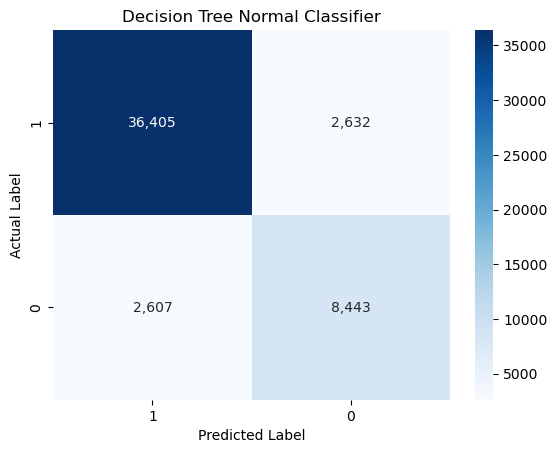

In [8]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
joblib.dump(model, "./models/classifications/DecisionTreeClassifier.joblib")
#model = joblib.load("./models/DecisionTreeClassifier.joblib")
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))                                                     
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True  , cmap='Blues', fmt=',d')
plt.ylim(0,2)
plt.xlim(2,0)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

plt.title("Decision Tree Normal Classifier")
plt.savefig("../images/classification_images/DecisionTreeClassifier_c.png")

# Clean Memory
del model
del y_pred


### Random Forest

              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82     11050
         1.0       0.95      0.95      0.95     39037

    accuracy                           0.92     50087
   macro avg       0.89      0.88      0.88     50087
weighted avg       0.92      0.92      0.92     50087



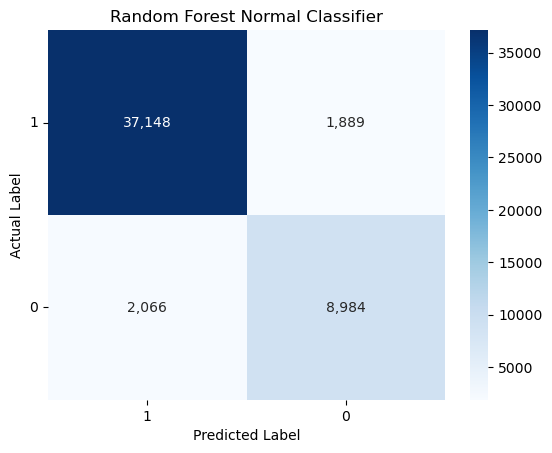

In [9]:
model = RandomForestClassifier(n_jobs=-1)

model.fit(X_train, y_train)
joblib.dump(model, "./models/classifications/RandomForestClassifier.joblib")
#model = joblib.load("./models/classifications/RandomForestClassifier.joblib")
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred )
sns.heatmap(cf_matrix, annot=True  , cmap='Blues', fmt=',d')
plt.ylim(0,2)
plt.xlim(2,0)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.yticks(rotation=0) 

plt.title("Random Forest Normal Classifier")
plt.savefig("../images/classification_images/RandomForestClassifier_c.png")

# Clean Memory
del model
del y_pred


### ExtraTreesClassifier

              precision    recall  f1-score   support

         0.0       0.83      0.73      0.78     11050
         1.0       0.93      0.96      0.94     39037

    accuracy                           0.91     50087
   macro avg       0.88      0.84      0.86     50087
weighted avg       0.90      0.91      0.90     50087



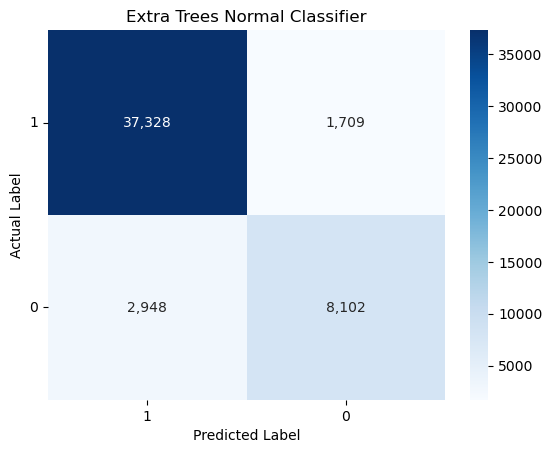

In [10]:
model = ExtraTreesClassifier(n_jobs=-1)
model.fit(X_train, y_train)
joblib.dump(model, "./models/classifications/ExtraTreesClassifier.joblib")
# model = joblib.load("./models/classifications/ExtraTreesClassifier.joblib")
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred )
sns.heatmap(cf_matrix, annot=True  , cmap='Blues', fmt=',d')
plt.ylim(0,2)
plt.xlim(2,0)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.yticks(rotation=0) 

plt.title("Extra Trees Normal Classifier")
plt.savefig("../images/classification_images/ExtraTreesClassifier_c.png")

# Clean Memory
del model
del y_pred

### Gradient Boosting

              precision    recall  f1-score   support

         0.0       0.83      0.68      0.75     11050
         1.0       0.91      0.96      0.94     39037

    accuracy                           0.90     50087
   macro avg       0.87      0.82      0.84     50087
weighted avg       0.90      0.90      0.90     50087



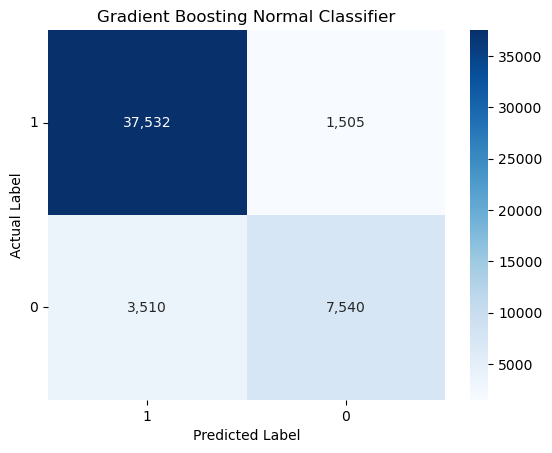

In [11]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
joblib.dump(model, "./models/classifications/GradientBoostingClassifier.joblib")
#model = joblib.load("./models/classifications/GradientBoostingClassifier.joblib")
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred )
sns.heatmap(cf_matrix, annot=True  , cmap='Blues', fmt=',d')
plt.ylim(0,2)
plt.xlim(2,0)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.yticks(rotation=0) 

plt.title("Gradient Boosting Normal Classifier")
plt.savefig("../images/classification_images/GradientBoostingClassifier_c.png")

### Bagging Classifier

              precision    recall  f1-score   support

         0.0       0.79      0.83      0.81     11050
         1.0       0.95      0.94      0.94     39037

    accuracy                           0.91     50087
   macro avg       0.87      0.89      0.88     50087
weighted avg       0.92      0.91      0.92     50087



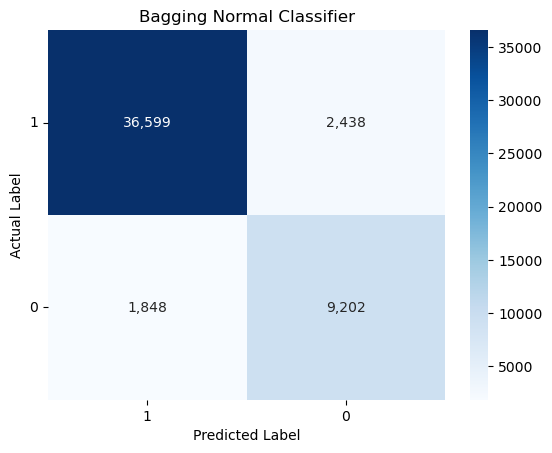

In [12]:
model = BaggingClassifier()
model.fit(X_train, y_train)
joblib.dump(model, "./models/classifications/BaggingClassifier.joblib")
#model = joblib.load("./models/classifications/BaggingClassifier.joblib")
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred )
sns.heatmap(cf_matrix, annot=True  , cmap='Blues', fmt=',d')
plt.ylim(0,2)
plt.xlim(2,0)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.yticks(rotation=0) 

plt.title("Bagging Normal Classifier")
plt.savefig("../images/classification_images/BaggingClassifier.png")

### AdaBoost Classifier

              precision    recall  f1-score   support

         0.0       0.79      0.67      0.72     11050
         1.0       0.91      0.95      0.93     39037

    accuracy                           0.89     50087
   macro avg       0.85      0.81      0.83     50087
weighted avg       0.88      0.89      0.88     50087



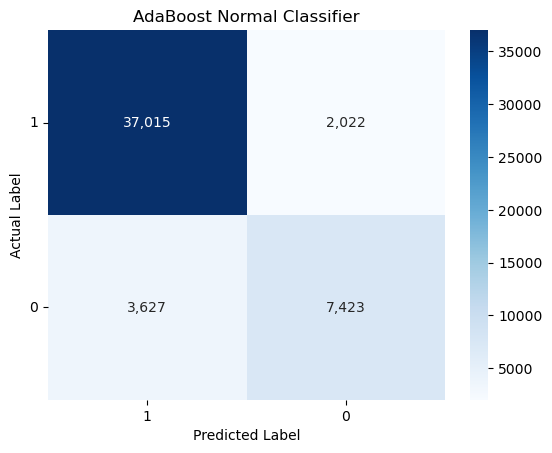

In [13]:
model = AdaBoostClassifier()
model.fit(X_train, y_train)
joblib.dump(model, "./models/classifications/AdaBoostClassifier.joblib")
#model = joblib.load("./models/classifications/AdaBoostClassifier.joblib")
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred )
sns.heatmap(cf_matrix, annot=True  , cmap='Blues', fmt=',d')
plt.ylim(0,2)
plt.xlim(2,0)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.yticks(rotation=0) 

plt.title("AdaBoost Normal Classifier")
plt.savefig("../images/classification_images/AdaBoostClassifier.png")

# Statistic on Classifiers

In [14]:
stats = pd.DataFrame(columns=["classifiers", "fpr", "tpr", "auc"])


classifiers = ["DecisionTreeClassifier", "ExtraTreesClassifier", "GradientBoostingClassifier",
               "RandomForestClassifier","BaggingClassifier", "AdaBoostClassifier"]
for classifier in classifiers:
    # Load the trained classifiers
    load_path = "./models/classifications/"+classifier+".joblib"
    model = joblib.load(load_path)
    y_pred = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test,  y_pred)
    auc = roc_auc_score(y_test, y_pred)
    # Record the results
    row = {"classifiers": classifier,"fpr": fpr,"tpr": tpr,"auc": auc}
    stats = pd.concat([stats, pd.DataFrame([row])], ignore_index=True)
    
    del model
    del y_pred

# Set name of the classifiers as index labels
stats.set_index("classifiers", inplace=True)

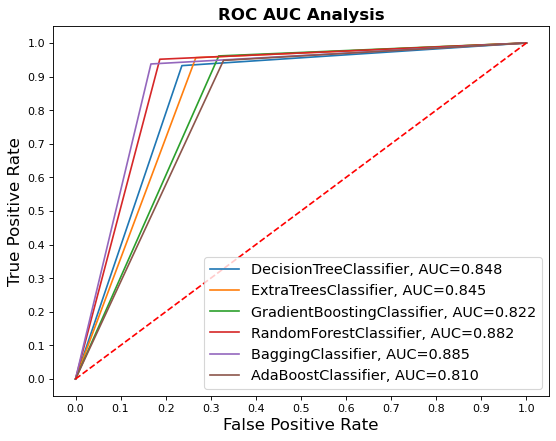

In [15]:
fig = plt.figure(figsize=(8,6), dpi=80)
for classifier in stats.index:
    plt.plot(stats.loc[classifier]["fpr"], 
             stats.loc[classifier]["tpr"], 
             label="{}, AUC={:.3f}".format(classifier, stats.loc[classifier]["auc"]))
    
plt.plot([0,1], [0,1], color='red', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title("ROC AUC Analysis", fontweight="bold", fontsize=15)
plt.legend(prop={"size":13}, loc="lower right")

plt.show()
fig.savefig("../images/classification_images/classifiers_statistics_c.png")

In [16]:
stats.to_csv("../processed_files/classification_auc.csv")